##Machine learning-based prediction of credit card approval based on customer information.##

##Abstract##
The increased credit card defaulters have forced the 
bank to think carefully before the approval of credit 
applications. Credit card bank usually use their judgment 
to determine whether a credit card should be issued to the 
customer satisfying certain criteria. Some machine learning 
algorithms have also been used to support the decision.

##Introduction
Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this notebook, we will build an automatic credit card approval predictor using machine learning techniques, just like the real banks do.

The structure of this notebook is as follows:

First, I started off by loading and viewing the dataset.

The dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.

Then, I preprocessed the dataset to ensure the machine learning model we choose can make good predictions.

After the data gets into good shape, I did some exploratory data analysis to build intuitions.

Finally, I built a machine learning model that can predict if an individual's application for a credit card will be accepted.

##Problem Statement##

##Goal##
The main objective of this project is to build a machine learning model based on the data sets provided which can support the credit card approval decision. Secondly, the performance of different built models is compared.

##Tasks to be performed##
1)Please perform all appropriate feature engineering tasks. 

2)Perform important data visualization techniques to find the pattern in data.

3)Report characteristics of important features, such as total number and percentage of each category in a table format after performing all relevant tasks.

4)Perform multiple machine learning models relevant to your hypothesis, justify your model.

5)Perform comparison to justify which model is better. 

In [109]:
#Importing the necessary libraries
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
#Loading the dataset
cc_approval = pd.read_csv('/content/Credit_card.csv')
cc_approval_label = pd.read_csv('/content/Credit_card_label.csv')

In [111]:
#Merge both the datasets
cc = cc_approval.merge(cc_approval_label, how='inner', on=['Ind_ID'])
cc.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [112]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

##Data Cleaning
Following steps need to be taken care of while data cleaning:

1)check duplicate data

2)check missing value

3)dealing with missing value

4)check column type

5)drop unnecessary column

##Inspecting The Credit card Applications##

*  figuring out the most important features of a credit card application. 

*   The probable features in a typical credit card application are Gender, Age, Car owner, Married, Property owner, Education, Annual income, Experience, Housing type, Employment type, Family members and finally the ApprovalStatus.











 






In [ ]:
#Checking column names
cc.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [113]:
#Checking if datatypes are read correctly
cc.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

In [114]:
#Print Dataframe Information
cc_info = cc.info()
print(cc_info)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [115]:
#First 5 rows of the dataset
cc.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [116]:
#Last 5 rows of the dataset
cc.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


In [117]:
cc_description = cc.describe()
print(cc_description)

             Ind_ID     CHILDREN  Annual_income  Birthday_count  \
count  1.548000e+03  1548.000000   1.525000e+03     1526.000000   
mean   5.078920e+06     0.412791   1.913993e+05   -16040.342071   
std    4.171759e+04     0.776691   1.132530e+05     4229.503202   
min    5.008827e+06     0.000000   3.375000e+04   -24946.000000   
25%    5.045070e+06     0.000000   1.215000e+05   -19553.000000   
50%    5.078842e+06     0.000000   1.665000e+05   -15661.500000   
75%    5.115673e+06     1.000000   2.250000e+05   -12417.000000   
max    5.150412e+06    14.000000   1.575000e+06    -7705.000000   

       Employed_days  Mobile_phone   Work_Phone        Phone     EMAIL_ID  \
count    1548.000000        1548.0  1548.000000  1548.000000  1548.000000   
mean    59364.689922           1.0     0.208010     0.309432     0.092377   
std    137808.062701           0.0     0.406015     0.462409     0.289651   
min    -14887.000000           1.0     0.000000     0.000000     0.000000   
25%     -31

In [74]:
# checking for duplicates
cc[cc.duplicated()].size

0

##Handling the missing values in the dataset


* Our dataset contains both numeric and non-numeric data (specifically data that are of float64, int64 and object types). Specifically, the features 0,4,5,10,11,12,13,14,15 and 17 contain numeric values (of types float64 and int64 ) and all the other features contain non-numeric values. 

In [118]:
#Check if the null values are present or absent
cc.isnull()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1544,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1545,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1546,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [119]:
#Check the missing values in each column
cc.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [120]:
#Replace   with NaN
cc = cc.replace('', np.nan, regex=True)
cc.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


##Handling the missing values in the dataset(Part-ii)

In [121]:
#Impute the missing values with mean imputation
cc.fillna(cc.mean(), inplace=True)

#Count the number of NaNs in the dataset to verify
print('Total NaN : '+ str(cc.isnull().values.sum()))
cc.isnull().sum()

Total NaN : 495


Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count       0
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

##Handling the missing values in the dataset(part - iii)

We have successfully taken care of the missing values present in the numeric columns. There are still some missing values to be imputed for columns 1,16. All of these columns contain non-numeric data and this why the mean imputation strategy would not work here. This needs a different treatment.

We are going to impute these missing values with the most frequent values as present in the respective columns.

In [122]:
#iterate over each column of cc_approval
for col in cc:
  #Check if the column is of object type
  if cc[col].dtypes == 'object':
    #impute with the most frequent value
    cc = cc.fillna(cc[col].value_counts().index[0])


#Count the number of NaNs in the dataset and print the counts to verify
print('Total Missing values:' + str(cc.isnull().values.sum()))
print('Missing values in each column:')
cc.isnull().sum()

Total Missing values:0
Missing values in each column:


Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [142]:
#Distribution of Credit card approval status
cc['label'].value_counts()

0    1373
1     175
Name: label, dtype: int64

This dataset is highly unbalanced.
Here,Column label is classified as

0 --> Application Approved

1 --> Application Rejected

##Feature Engineering

In [161]:
## This function takes no of days and convert it into their datetime format
def Date_of_Birth(total_days):
    today = datetime.date.today()
    birthday = (today + timedelta(days=total_days)).strftime('%Y-%m-%d')
    return birthday                  

## This Function takes value of colunn Days of Employed and convert it into datetime format
def Employed_day(total_days):
    today = datetime.date.today()
    employed_date = (today + datetime.timedelta(days=total_days)).strftime('%Y-%m-%d')

In [163]:
cc['Birthday_count']=cc['Birthday_count'].apply(Date_of_Birth)

TypeError: ignored

In [154]:
cc['Employed_days']=cc['Employed_days'].apply(Date_of_Birth)

In [185]:
cc

,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label
0,M,Y,Y,180000.00000,Pensioner,Higher education,Married,House / apartment,1971-10-28,3023-03-22,F,2,1
1,F,Y,N,315000.00000,Commercial associate,Higher education,Married,House / apartment,1986-02-06,2021-08-12,F,2,1
2,F,Y,N,315000.00000,Commercial associate,Higher education,Married,House / apartment,1979-04-20,2021-08-12,F,2,1
3,F,Y,N,191399.32623,Commercial associate,Higher education,Married,House / apartment,1986-02-06,2021-08-12,F,2,1
4,F,Y,N,315000.00000,Commercial associate,Higher education,Married,House / apartment,1986-02-06,2021-08-12,F,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,Y,191399.32623,Commercial associate,Higher education,Married,House / apartment,1990-06-25,2017-03-30,Managers,2,0
1544,F,N,N,225000.00000,Commercial associate,Incomplete higher,Single / not married,House / apartment,1995-03-19,2019-11-28,Accountants,1,0
1545,M,Y,Y,180000.00000,Working,Higher education,Married,House / apartment,1987-02-24,2016-06-08,Managers,4,0
1546,M,Y,N,270000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,1981-05-08,2021-06-14,Drivers,2,0


In [184]:
cc.drop(columns=['Ind_ID','CHILDREN','Mobile_phone','Work_Phone','Phone','EMAIL_ID'], inplace=True)
cc.sample(10)

KeyError: ignored

##Data Analysis and Visualization

In [146]:
cc.corrwith(cc['label'])*100

Annual_income       2.687462
Birthday_count     -4.483087
Employed_days       3.140829
Family_Members     -3.070938
label             100.000000
dtype: float64

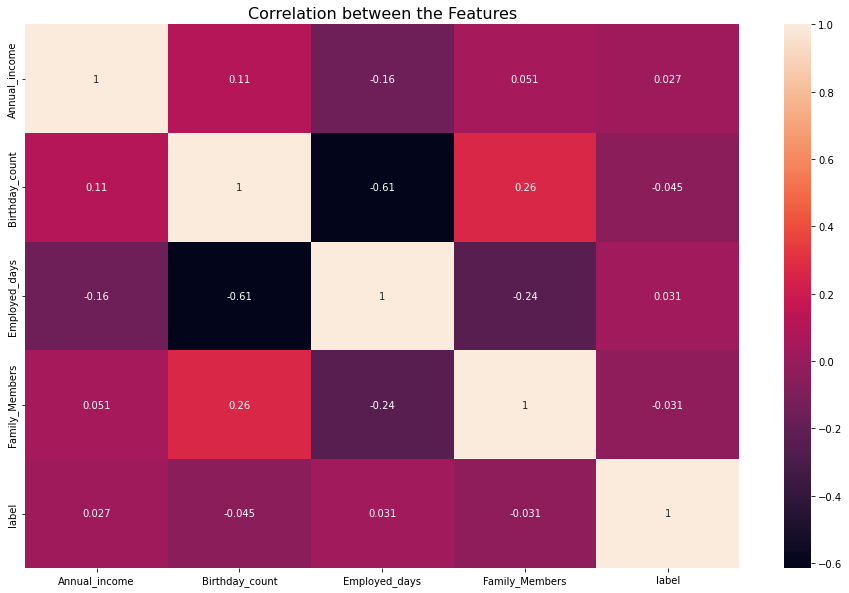

In [148]:
plt.figure(figsize = (16,10))
sns.heatmap(cc.corr(),annot= True)
plt.title('Correlation between the Features', size = 16)
plt.show()

In [149]:
#Count of family members, Count of childern and Income are closely related with Target column
num_cols = [col for col in cc.columns if cc[col].dtype!='O']
str_cols = [col for col in cc.columns if cc[col].dtype=='O']

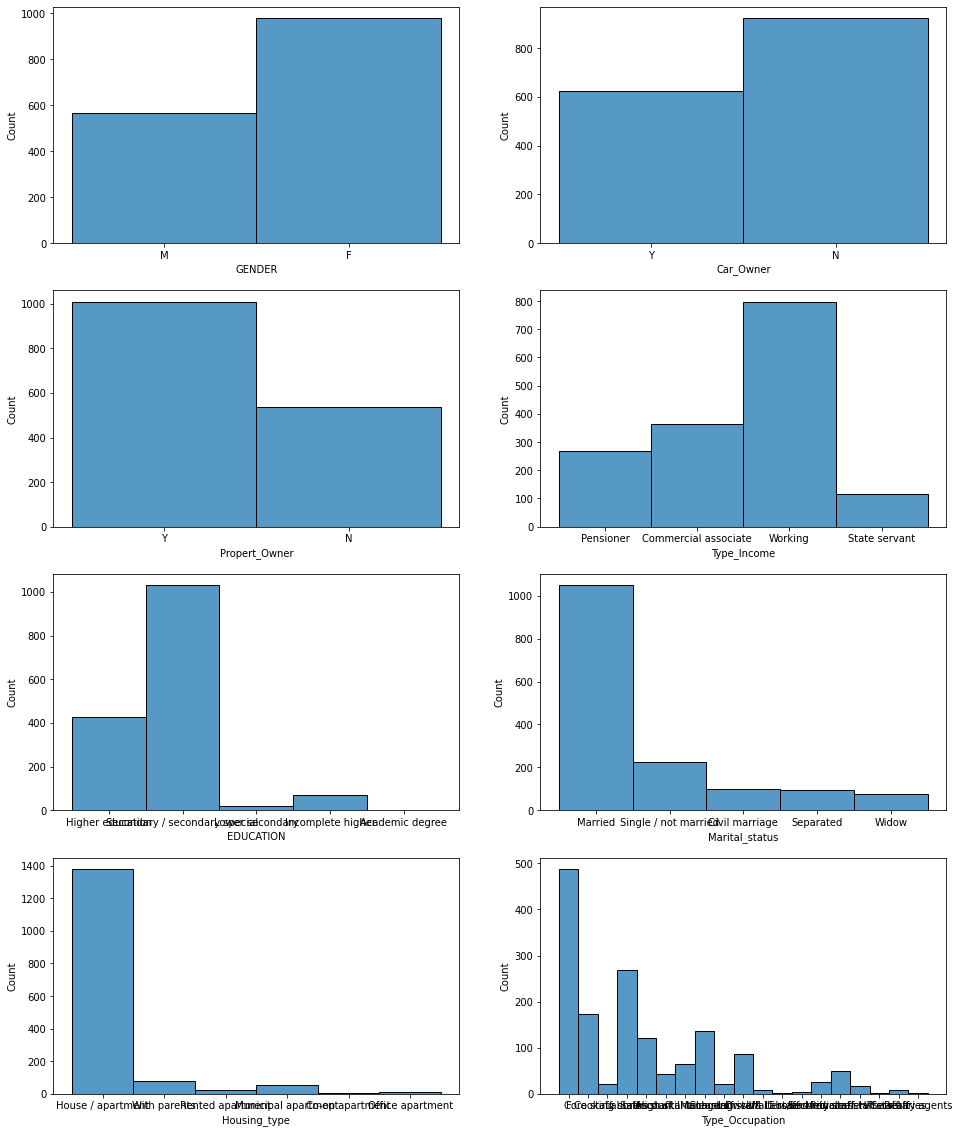

In [183]:
plt.figure(figsize=(16,20))
for i in range(1,9):
    plt.subplot(4,2,i)
    sns.histplot(cc[str_cols[i-1]])

In [173]:
cc['Marital_status'].value_counts()

Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, dtype: int64

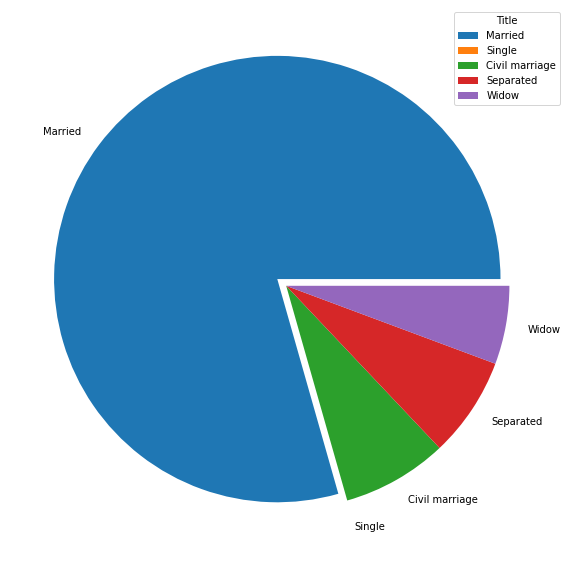

In [174]:
plt.figure(figsize=(10,12))
e=(0.05,0.02,0,0,0)
m=cc['Marital_status']=='Married'
m=m.sum()
s=cc['Marital_status']=='Single'
s=s.sum()
Cv=cc['Marital_status']=='Civil marriage'
Cv=Cv.sum()
sep=cc['Marital_status']=='Separated'
sep=sep.sum()
w=cc['Marital_status']=='Widow'
w=w.sum()
y=np.array([m,s,Cv,sep,w])
label=['Married','Single','Civil marriage','Separated','Widow']
plt.pie(y,explode=e,labels=label)
plt.legend(title="Title")

From the above pie chart ,we conclude that majority of people are married so there expenses more than others.so, we can approve their credit card bcz they can use credit card regularly and in efficient manner for their expenses.

In [175]:
cc['Housing_type'].value_counts()

House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: Housing_type, dtype: int64

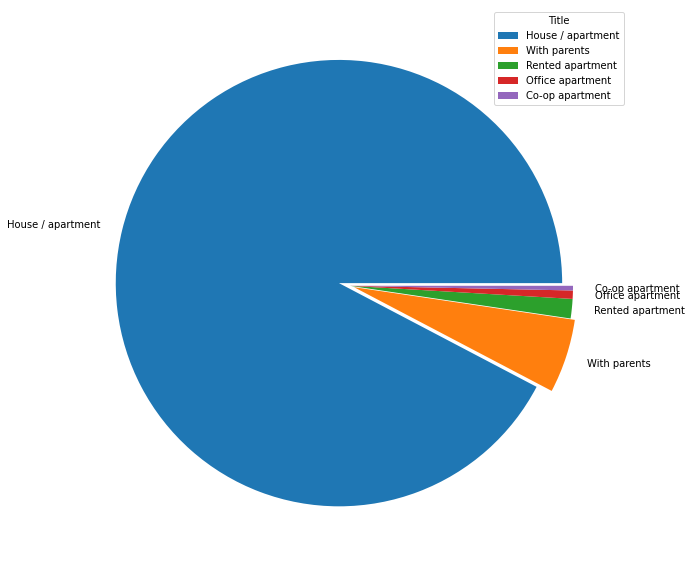

In [176]:
plt.figure(figsize=(10,12))
e=(0.05,0.02,0,0,0)
m=cc['Housing_type']=='House / apartment'
m=m.sum()
s=cc['Housing_type']=='With parents'
s=s.sum()
Cv=cc['Housing_type']=='Rented apartment'
Cv=Cv.sum()
sep=cc['Housing_type']=='Office apartment'
sep=sep.sum()
w=cc['Housing_type']=='Co-op apartment'
w=w.sum()
y=np.array([m,s,Cv,sep,w])
label=['House / apartment','With parents','Rented apartment','Office apartment','Co-op apartment']
plt.pie(y,explode=e,labels=label)
plt.legend(title="Title")

From this above pie chart , we conclude that most of the people lives in their own house or apartment.So There is a high chance that they are able to pay their bills on time ,so we can approve their credit card

##Preprocessing the dataset

The missing values are now successfully handled.

There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into three main tasks:

1.Convert the non-numeric data into numeric.

2.Split the data into train and test sets.

3.Scale the feature values to a uniform range.

In [177]:
#Import Label Encoder
from sklearn.preprocessing import LabelEncoder
#Initiate LabelEncoder
le = LabelEncoder()
#Iterate over all the values of each column and extract their dtypes
for col in cc_approval:
  #Compare if the dtype is object
  if cc_approval[col].dtypes == 'object':
    #Use LabelEncoder to do the numeric transformation
    le.fit(cc_approval[col])
    cc_approval[col]=le.transform(cc_approval[col])


#Information of the new dataframe
cc_approval.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1548 non-null   int64  
 2   Car_Owner        1548 non-null   int64  
 3   Propert_Owner    1548 non-null   int64  
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   int64  
 7   EDUCATION        1548 non-null   int64  
 8   Marital_status   1548 non-null   int64  
 9   Housing_type     1548 non-null   int64  
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1548 non-null   int64  
 17  Family_Members

##Feature Scaling

In [178]:
x=cc.drop('label',axis=1)
y=cc['label']

In [182]:
feature_scale = [feature for feature in cc.columns if feature!='label']

## Importing library 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x)

ValueError: ignored

In [180]:
scaler.transform(x)

ValueError: ignored

In [107]:
cc = pd.concat([cc['label'].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(x), columns=feature_scale)],
                    axis=1)

ValueError: ignored

In [108]:
cc.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,BIRTH_DAY,EMPLOYED_DAY,AGE,DOB
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,...,0,0,0,F,2,1,1971-10-28,0,51,1971-10-28
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,1,1,0,F,2,1,1986-02-06,2021-08-12,37,1986-02-06
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,1,1,0,F,2,1,1979-04-20,2021-08-12,43,1979-04-20
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,...,1,1,0,F,2,1,1986-02-06,2021-08-12,37,1986-02-06
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,1,1,0,F,2,1,1986-02-06,2021-08-12,37,1986-02-06


In [136]:
cc.label.value_counts()

0    1373
1     175
Name: label, dtype: int64

##Dealing with Unbalanced Dataset

In [137]:
from imblearn.combine import SMOTETomek

In [138]:
smk=SMOTETomek(random_state=12)

In [139]:
cc.shape

(1548, 19)

In [140]:
x_res,y_res=smk.fit_resample(x,y)

ValueError: ignored

In [181]:
x_res.shape

NameError: ignored

In [ ]:
y_res.shape

In [ ]:
from collections import Counter

In [ ]:
print('original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

##Model Deployment

Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then apply the scaling.

Split into Training & Testing

In [ ]:
#Import train _test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import logisticRegression
from sklearn.metrics import accuracy_score

KeyError: ignored

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=567)

In [ ]:
x_train.shape,y_train.shape

In [ ]:
## import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

In [ ]:
model_list=[LogisticRegression,RandomForestClassifier,DecisionTreeClassifier,GaussianNB,KNeighborsClassifier]

In [ ]:
accuracy =[]
for model in model_list :
    model = model()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    accuracy.append(accuracy_score(y_test,y_pred))


Accuracy Score

In [ ]:
accuracy